## Well basics

Some preliminaries...

In [1]:
%matplotlib inline
import welly
welly.__version__

'0.1.0'

## Load a well

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well
w = Well.from_las('P-129_out.LAS')

In [3]:
w  # There is no __repr__() function yet.

## Header

Maybe should be called 'meta' as it's not really a header... 

In [4]:
w.header

{'license': 'P-129', 'name': 'Kennetcook #2', 'field': 'Windsor Block'}

In [5]:
w.header.name

'Kennetcook #2'

## Curves

Just a list of objects.

In [6]:
w.curves  # Just a list of curves objects.

{'CALI': <welly.curve.Curve at 0x105ff75c0>,
 'DEPT': <welly.curve.Curve at 0x105ff7cc0>,
 'DPHI_DOL': <welly.curve.Curve at 0x10aa73be0>,
 'DPHI_LIM': <welly.curve.Curve at 0x10aa73ac8>,
 'DPHI_SAN': <welly.curve.Curve at 0x10aa73a90>,
 'DRHO': <welly.curve.Curve at 0x10aa73e80>,
 'DT': <welly.curve.Curve at 0x10aa73b38>,
 'DTS': <welly.curve.Curve at 0x10aa73b00>,
 'GR': <welly.curve.Curve at 0x10aa73ef0>,
 'HCAL': <welly.curve.Curve at 0x10aa68e10>,
 'NPHI_DOL': <welly.curve.Curve at 0x10aa73c50>,
 'NPHI_LIM': <welly.curve.Curve at 0x10aa73c18>,
 'NPHI_SAN': <welly.curve.Curve at 0x10aa73ba8>,
 'PEF': <welly.curve.Curve at 0x10aa73b70>,
 'RHOB': <welly.curve.Curve at 0x10aa73eb8>,
 'RLA1': <welly.curve.Curve at 0x10aa73d30>,
 'RLA2': <welly.curve.Curve at 0x10aa73d68>,
 'RLA3': <welly.curve.Curve at 0x10aa73cc0>,
 'RLA4': <welly.curve.Curve at 0x10aa73cf8>,
 'RLA5': <welly.curve.Curve at 0x10aa73c88>,
 'RM_HRLT': <welly.curve.Curve at 0x10aa73e48>,
 'RT_HRLT': <welly.curve.Curve at 

In [7]:
w.curves['GR'].basis[:15]

array([ 1.0668,  1.2192,  1.3716,  1.524 ,  1.6764,  1.8288,  1.9812,
        2.1336,  2.286 ,  2.4384,  2.5908,  2.7432,  2.8956,  3.048 ,
        3.2004])

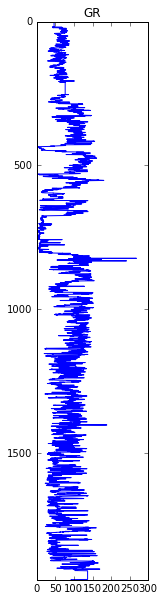

In [8]:
w.curves['GR'].plot()

In [9]:
w.curves['GR'].read_at(1002)  # read_at([100, 200, 300])  # array-like

121.88298959622053

In [12]:
sgmt = w.curves['GR'].segment((1000, 1200))   # optional: new step  # optional pass back basis

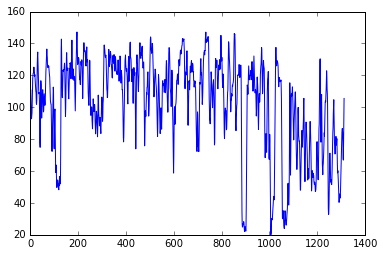

In [15]:
import matplotlib.pyplot as plt
plt.plot(sgmt)